# Projet SPLEX : Data Analysis on Student's Daily Lifestyle &  Academic Performance

- Date : 10/01/2025

- Student 1 : Océane LI (n_etudiant : 28602519)

- Student 2 : Adam BOUMESSAOUD (n_etudiant : 28710653)

## 1. Introduction du dataset

Le dataset que nous allons étudier dans ce projet (**`student_lifestyle_dataset.csv`**) contient des informations détaillées sur les habitudes de vie quotidiennes de 2 000 étudiants et leur relation avec les performances académiques, représentées par le CGPA (*Cumulative Grade Point Average*). Les données de ce dataset ont été collectées à partir d'un sondage réalisé à l'aide de Google Forms, sur une période correspondant à une année académique, soit d'août 2023 à mai 2024. Les réponses proviennent principalement d'étudiants en Inde et d'autres pays d'Asie du Sud où le système CGPA est couramment utilisé. Les 2000 participants appartiennent à différentes institutions éducatives, ce qui garantit une diversité des contextes et des habitudes étudiantes.

### Contenu du dataset

Un nettoyage des données a déjà été effectué par l'auteur pour exclure les réponses incomplètes ou incohérences du sondage. L'objectif principal de ce sondage était d'étudier l'impact des habitudes quotidiennes (étude, sommeil, activités physiques, sociales, etc.) sur la performance académique et le bien-être étudiant.

Le fichier CSV est composé de 2000 lignes (étudiants) * 8 colonnes (variables) :

1. `Student_ID` : Identifiant unique pour chaque étudiant.

2. `Study_Hours` : Nombre d’heures quotidiennes consacrées à l'étude.

3. `Extracurricular_Hours_Per_Day` : Temps quotidien passé à des activités parascolaires (sports, arts, clubs, etc.).

4. `Sleep_Hours_Per_Day` : Nombre d’heures de sommeil par jour.

5. `Social_Hours_Per_Day` : Temps quotidien passé à socialiser (amis, famille, réseaux sociaux).

6. `Physical_Activity_Hours_Per_Day` :Nombre d’heures consacrées à l’activité physique (exercice, sport).

7. `GPA` : Performance académique sous forme de moyenne pondérée cumulative.

8. `Stress_Level` : Niveau de stress, calculé en fonction des heures d'étude et de sommeil. (Échelle ou score non précisé dans la description).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("student_lifestyle_dataset.csv")
data

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0                   4.2   
2                     9.2                   1.2   
3                     7.2                   1.7   
4                     6.5                   2.2   
...                   ...                   ...   
1995                  7.4                   2.1   
1996                  8.8                   1.5   
1997                  6.2                   0.8   
1998                  7.6                   3.5   
1999                  7.3                   3.1   

      Physical_Activity_Hours_Per_Day   GPA Stress_Level  
0                                 1.8  2.99     Moderate  
1                                 3.0  2.75          Low  
2                                 4.6  2.67          Low  
3                                 6.5  2.88     Moderate  
4                                 6.6  3.51         High  
...                               ...   ...          ...  
1995                              7.8  3.32     Moderate  
1996                              4.6  2.65     Moderate  
1997                             10.8  3.14     Moderate  
1998                              4.1  3.04         High  
1999                              2.9  3.58         High  

[2000 rows x 8 columns]

In [3]:
data.info()  # general information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [6]:
data.describe() # statistiques descriptives

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.500000              2.600000   
75%               8.800000              4.100000   
max              10.000000              6.000000   

       Physical_Activity_Hours_Per_Day          GPA  
count                       2000.00000  2000.000000  
mean                           4.32830     3.115960  
std                            2.51411     0.298674  
min                            0.00000     2.240000  
25%                            2.40000     2.900000  
50%                            4.10000     3.110000  
75%                            6.10000     3.330000  
max                           13.00000     4.000000

In [4]:
# Check missing values
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


#
### Distribution des variables

On visualise la répartition des variables numériques pour identifier les tendances ou anomalies.

In [18]:
from summarytools import dfSummary

dfSummary(data) # summary of dataset

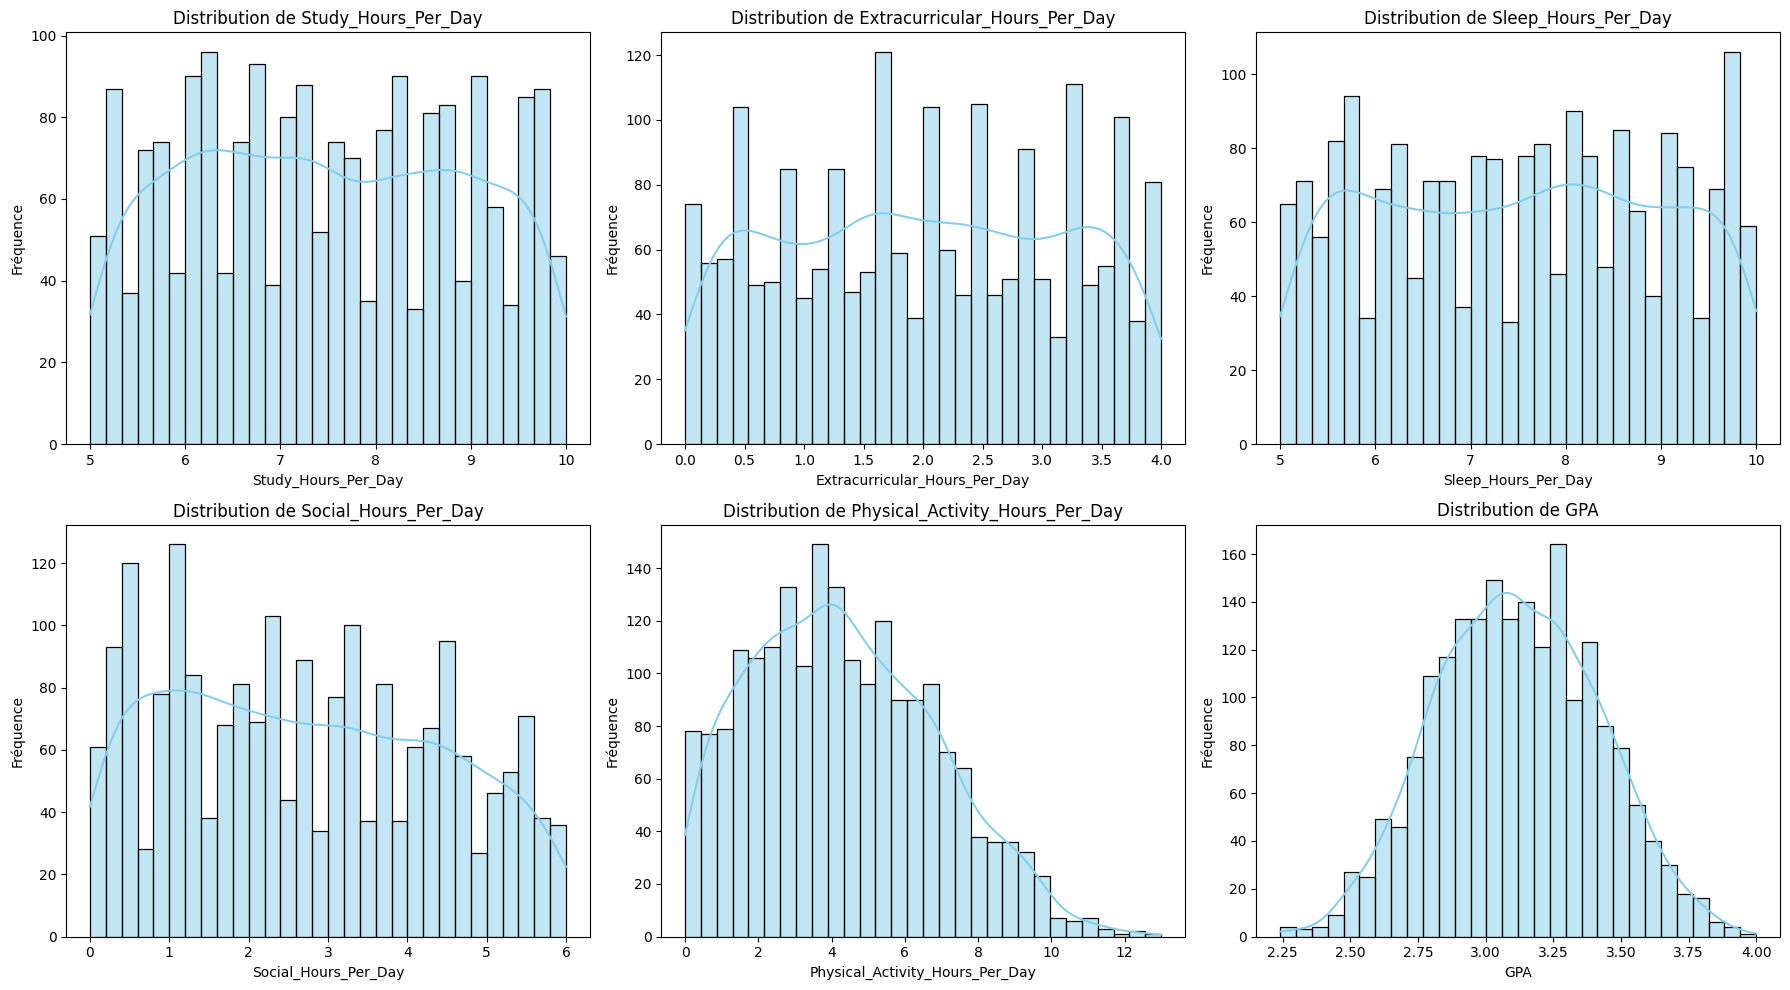

In [5]:
# Visualisation des distributions (plus en détail)
numeric_cols = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "GPA",
]

fig, axes = plt.subplots(2, 3, figsize=(18, 2 * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Fréquence")
plt.tight_layout()
plt.show()

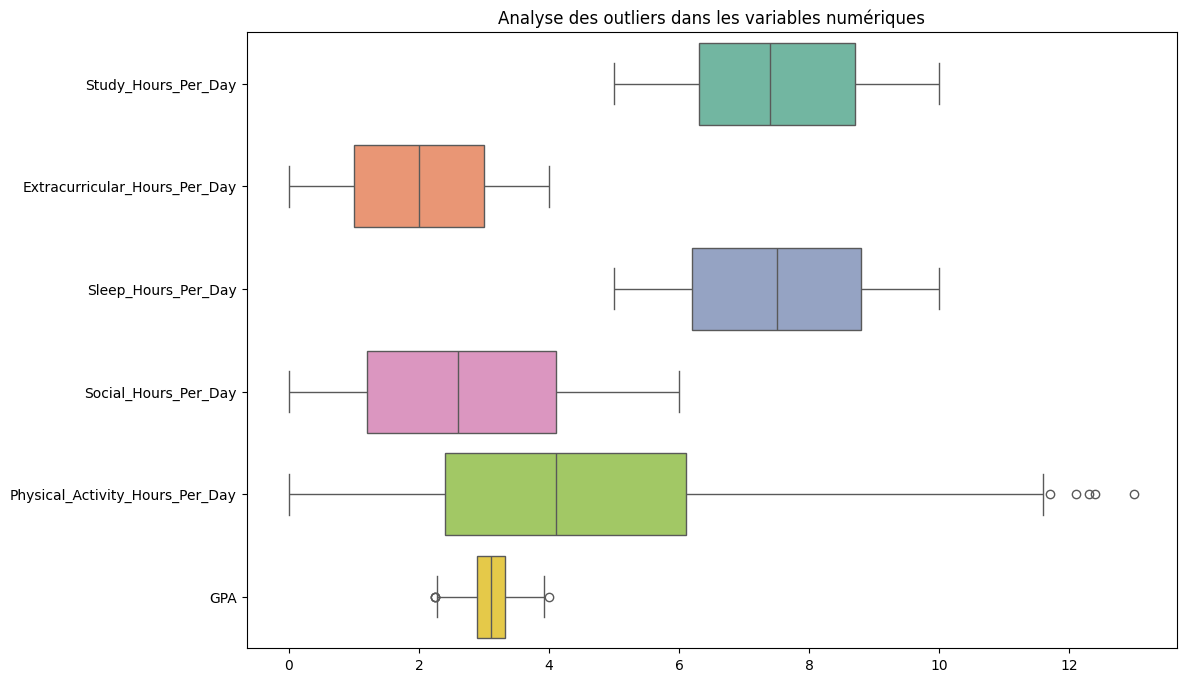

In [6]:
# Boîtes à moustaches pour repérer les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_cols], orient="h", palette="Set2")
plt.title("Analyse des outliers dans les variables numériques")
plt.show()

C:\Users\Océane\AppData\Local\Temp\ipykernel_15428\2616651230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Stress_Level", data=data, palette="Set3")


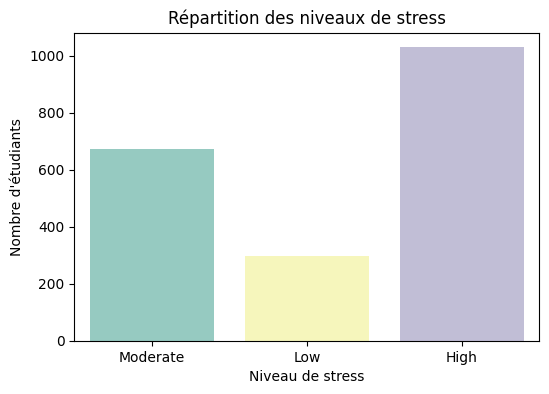

In [7]:
# Répartition des niveaux de stress
plt.figure(figsize=(6, 4))
sns.countplot(x="Stress_Level", data=data, palette="Set3")
plt.title("Répartition des niveaux de stress")
plt.xlabel("Niveau de stress")
plt.ylabel("Nombre d'étudiants")
plt.show()

C:\Users\Océane\AppData\Local\Temp\ipykernel_21304\1269661531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stress_Level", y="Study_Hours_Per_Day", data=data, palette="coolwarm")


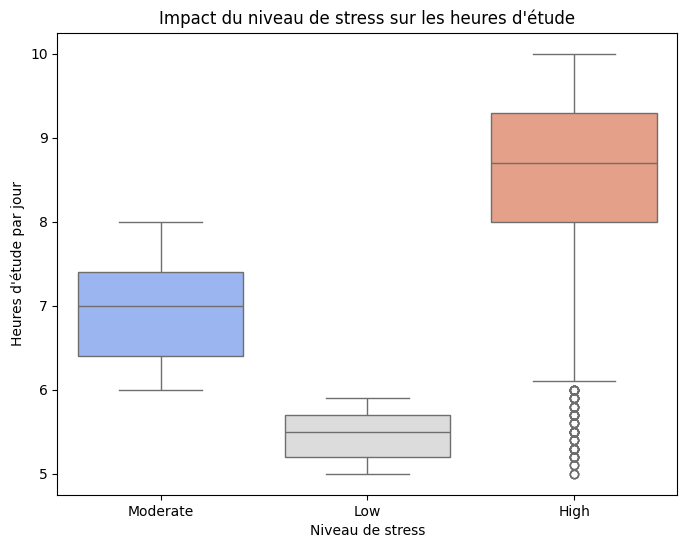

In [16]:
# Impact du stress sur le nombre d'heures d'étude
plt.figure(figsize=(8, 6))
sns.boxplot(x="Stress_Level", y="Study_Hours_Per_Day", data=data, palette="coolwarm")
plt.title("Impact du niveau de stress sur les heures d'étude")
plt.xlabel("Niveau de stress")
plt.ylabel("Heures d'étude par jour")
plt.show()

#
## 2. Analyse en Composantes Principales (PCA)

### PCA pour clusteriser les observations

Réduire la dimension des données à 2 ou 3 composantes principales et visualiser les observations.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

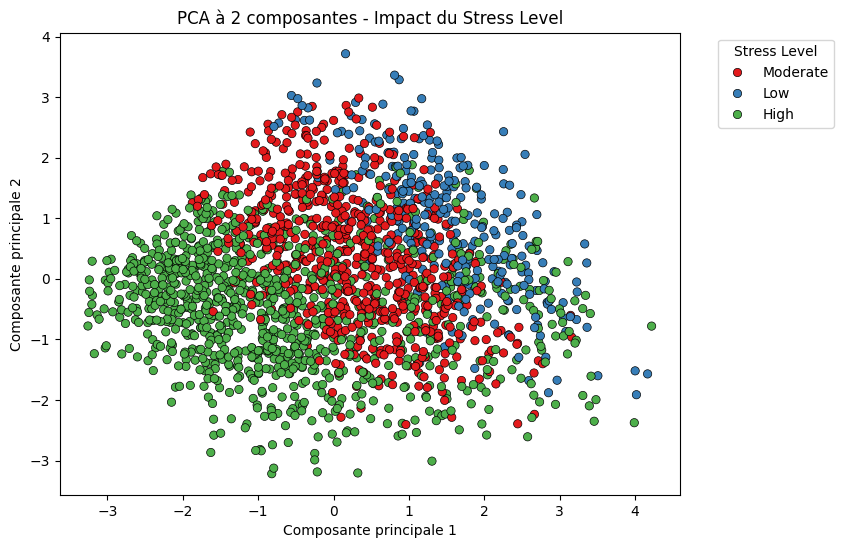

In [33]:
# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# PCA 2D
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)

pca_df_2d = pd.DataFrame(pca_2d_result, columns=["PC1", "PC2"])
pca_df_2d["Stress_Level"] = data["Stress_Level"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Stress_Level",
    data=pca_df_2d,
    palette="Set1",
    edgecolor="k",
)
plt.title("PCA à 2 composantes - Impact du Stress Level")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [35]:
pca_df_2d

PC1       PC2 Stress_Level
0    -0.559182  1.692369     Moderate
1     0.898569  2.313816          Low
2     1.291046  1.797384          Low
3     1.345880 -0.140388     Moderate
4    -0.069829 -1.963557         High
...        ...       ...          ...
1995  1.088304 -1.445923     Moderate
1996  1.054933  1.159099     Moderate
1997  2.443123 -2.392607     Moderate
1998 -0.021418 -0.173493         High
1999 -1.681989 -0.805349         High

[2000 rows x 3 columns]

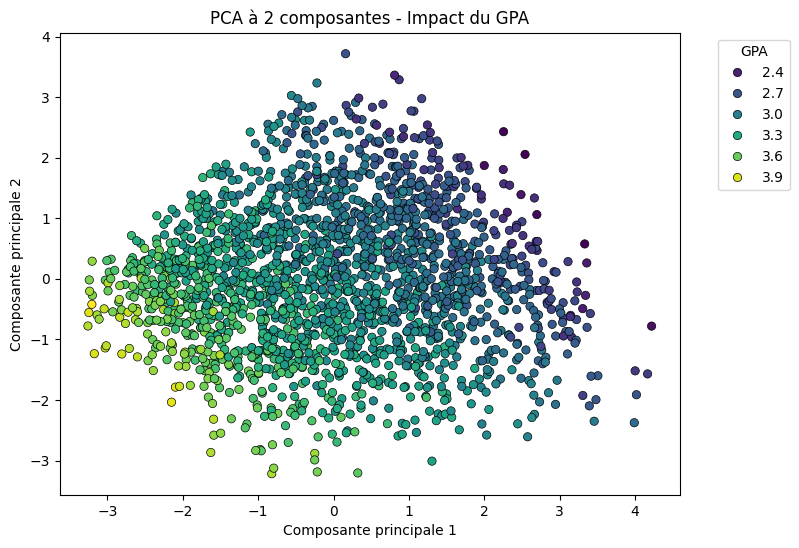

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue=data["GPA"],
    data=pca_df_2d,
    palette="viridis",
    edgecolor="k",
)
plt.title("PCA à 2 composantes - Impact du GPA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="GPA", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [37]:
# Variance expliquée
print("Variance expliquée par chaque composante :", pca_2d.explained_variance_ratio_)
print("Variance totale expliquée :", np.sum(pca_2d.explained_variance_ratio_))

Variance expliquée par chaque composante : [0.3583568  0.22725407]
Variance totale expliquée : 0.5856108725399022


**Interprétation :**
* La PCA permet de résumer les informations des données initiales en un nombre réduit de dimensions tout en conservant un maximum de variance. Ici, la 1ère composante principale (PC1) explique 35.84% de la variance totale des données ; et la 2ème composante principale (PC2) explique 22.73 % de la variance totale. Ces deux dimensions capturent environ 58.56 % de l'information totale présente dans les données.

* Clusters : on observe l'apparition de clusters sur les graphes 2D, ce qui peut indiquer que certains groupes d'étudiants partagent des habitudes ou des performances similaires. En d'autres termes, les habitudes de vie ont très probablement une influence sur les performances académiques.

Il reste environ 41.44% de la variance des données qui reste inexpliquée par ces 2 premières composantes. On a alors examiner d'autres composantes pour compléter cette analyse :

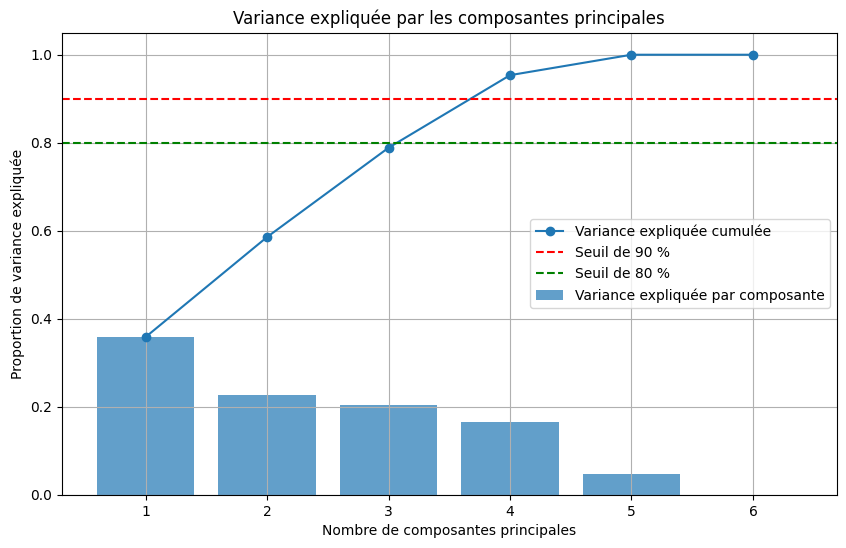

Nombre de composantes nécessaires pour atteindre 80 % : 4
Nombre de composantes nécessaires pour atteindre 90 % : 4


In [38]:
# compute all composantes
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

# Variance expliquée cumulée
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance) + 1),
    cumulative_variance,
    marker="o",
    label="Variance expliquée cumulée",
)
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance,
    alpha=0.7,
    label="Variance expliquée par composante",
)
plt.axhline(y=0.9, color="r", linestyle="--", label="Seuil de 90 %")
plt.axhline(y=0.8, color="g", linestyle="--", label="Seuil de 80 %")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")
plt.title("Variance expliquée par les composantes principales")
plt.legend()
plt.grid()
plt.show()

# Nombre de composantes nécessaires pour atteindre 80 % ou 90 % de variance
num_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Nombre de composantes nécessaires pour atteindre 80 % : {num_components_80}")
print(f"Nombre de composantes nécessaires pour atteindre 90 % : {num_components_90}")

Les résultats montrent que 4 composantes principales suffisent pour expliquer à la fois 80 % et 90 % de la variance totale des données. Ces 4 composantes sont des combinaisons linéaires des variables initiales qui maximisent la variance tout en étant orthogonales les unes aux autres. Elles capturent les structures principales dans nos données.

Examinons à présent les coefficients des composantes principales pour déterminer quelles variables contribuent le plus à chacune des 4 premières composantes :

Contributions des variables aux 4 premières composantes :
                                      PC1       PC2       PC3       PC4
Study_Hours_Per_Day             -0.573189 -0.359602  0.063352  0.033544
Extracurricular_Hours_Per_Day   -0.161667  0.361241 -0.374335  0.772813
Sleep_Hours_Per_Day             -0.235578  0.363706 -0.495702 -0.631748
Social_Hours_Per_Day            -0.036257  0.450519  0.766644 -0.036509
Physical_Activity_Hours_Per_Day  0.560202 -0.476340 -0.090617  0.017332
GPA                             -0.524099 -0.421950  0.119103  0.029943


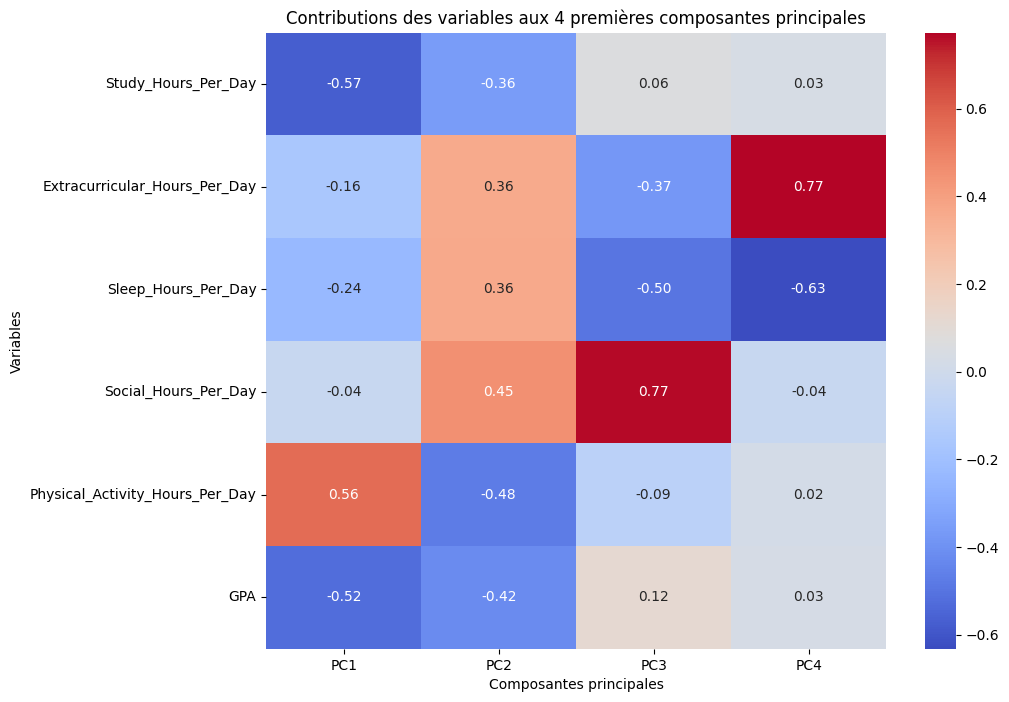

In [39]:
# coefs des PC
loadings = pd.DataFrame(
    pca.components_[:4].T,
    columns=[f"PC{i+1}" for i in range(4)],
    index=numeric_cols,
)

print("Contributions des variables aux 4 premières composantes :")
print(loadings)

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Contributions des variables aux 4 premières composantes principales")
plt.xlabel("Composantes principales")
plt.ylabel("Variables")
plt.show()

**Interprétation :^**
* PC1 : ``Study_Hours_Per_Day`` (-0.573) et ``GPA`` (-0.524) ont des contributions majeures et négatives. ``Physical_Activity_Hours_Per_Day`` (0.560) a une forte contribution positive. Cette composante semble différencier les étudiants qui consacrent beaucoup de temps aux études (et obtiennent un bon GPA) de ceux qui investissent davantage de temps dans des activités physiques.

* PC2 : ``Social_Hours_Per_Day`` (0.451) et ``Sleep_Hours_Per_Day`` (0.364) ont des contributions importantes et positives. Cette composante capture un équilibre entre les interactions sociales et le sommeil d'un côté, et l'activité physique de l'autre. Les individus qui passent plus de temps dans des activités sociales et de sommeil ont des valeurs plus élevées sur cette composante.

* PC3 : ``Social_Hours_Per_Day`` (0.767) a une contribution prédominante positive. ``Sleep_Hours_Per_Day`` (-0.496) et ``Extracurricular_Hours_Per_Day`` (-0.374) ont des contributions négatives. Cette composante capture une opposition entre le temps consacré aux interactions sociales et celui dédié à des activités parascolaires ou au sommeil.

* PC4 : ``Extracurricular_Hours_Per_Day`` (0.773) a une contribution dominante positive. ``Sleep_Hours_Per_Day`` (-0.632) a une contribution négative significative. Cette composante différencie ceux qui passent plus de temps dans des activités extrascolaires de ceux qui consacrent davantage de temps au sommeil.

#
### Kernel PCA

Effectuer une PCA non-linéaire et visualiser les résultats. La Kernel PCA (KPCA) est une extension de la PCA qui peut capturer des relations non linéaires dans les données en utilisant une transformation dans un espace de caractéristiques de plus haute dimension via des noyaux (kernels) :

* On utilise le noyau RBF (Radial Basis Function, aussi appelé noyau gaussien) pour faire cette transformation.

* La valeur de gamma détermine l'influence d'un seul point de données dans l'espace transformé (un gamma élevé correspond à une influence locale plus forte).

* Les données sont visualisées dans les 2 premières composantes principales issues de la KPCA.


In [49]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "gamma": np.logspace(-3, 3, 7),  # de 0.001 à 1000)
    "degree": [2, 3, 4],  # for 'poly'
    "coef0": [0, 1, 10],  # for 'poly' and 'sigmoid'
}

# GridSearch for best parameters
kernel_pca = KernelPCA(n_components=2)
grid_search = GridSearchCV(
    kernel_pca, param_grid, cv=5, scoring="neg_mean_squared_error"
)
grid_search.fit(scaled_data)

print("Meilleurs paramètres : ", grid_search.best_params_)

C:\Users\Océane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Océane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 975, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Océane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test 

Meilleurs paramètres :  {'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


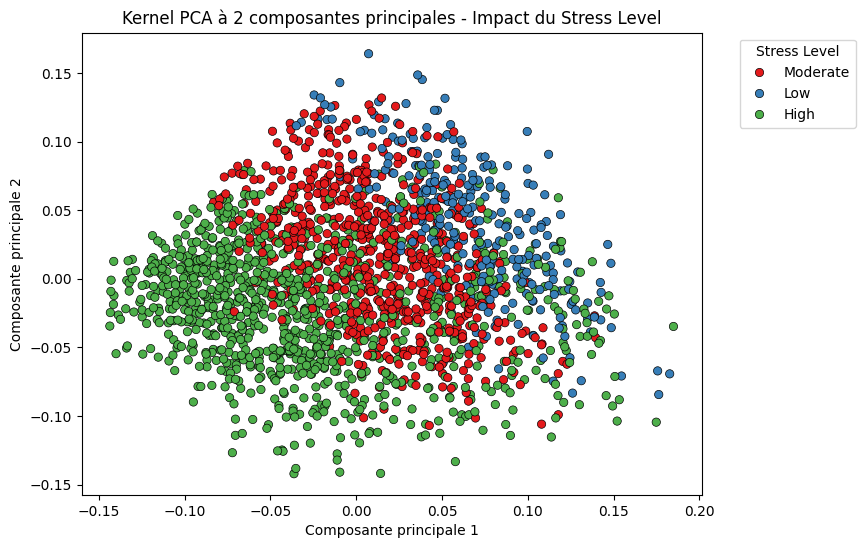

In [52]:
# Standardiser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Kernel PCA avec noyau RBF
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.001)
kernel_pca_result = kernel_pca.fit_transform(scaled_data)

kernel_pca_df = pd.DataFrame(kernel_pca_result, columns=["PC1", "PC2"])
kernel_pca_df["Stress_Level"] = data["Stress_Level"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Stress_Level",
    data=kernel_pca_df,
    palette="Set1",
    edgecolor="k",
)
plt.title("Kernel PCA à 2 composantes principales - Impact du Stress Level")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Stress Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Le kernel PCA donne des résultats très similaires que ceux obtenus avec une PCA classique. Une PCA classique suffit donc pour visualiser les clusters dans nos données (pas forcément besoin d'un kernel PCA).

#
## 3. Clustering non supervisé

Après avoir observé que le PCA 2D révèle des clusters distincts pour chaque niveau de stress, plusieurs étapes et approches peuvent être envisagées. Par exemple, pour confirmer l'existence des clusters identifiés par PCA sans utiliser les labels (niveaux de stress), on peut appliquer des méthodes de clustering.

#
### K-Means Clustering

On peut appliquer K-Means pour diviser les données en 3 clusters (basé sur l'observation des clusters PCA). On compare ensuite les clusters trouvés avec les vrais labels pour évaluer leur concordance (ARI).

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

Adjusted Rand Index (K-Means): 0.25


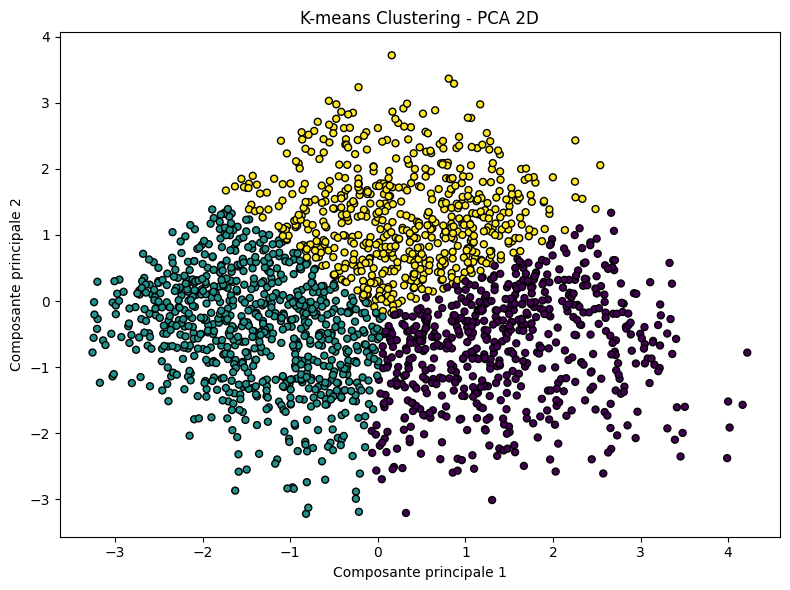

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# K-Means avec 3 clusters
kmeans = KMeans(
    n_clusters=3, init="k-means++", max_iter=100, n_init=10, random_state=42
)
kmeans_labels = kmeans.fit_predict(pca_df_2d[["PC1", "PC2"]])

# Évaluation des clusters
ari = adjusted_rand_score(data["Stress_Level"], kmeans_labels)
print(f"Adjusted Rand Index (K-Means): {ari:.2f}")

scatter = ax.scatter(
    pca_df_2d["PC1"],
    pca_df_2d["PC2"],
    s=25,
    c=kmeans_labels,
    cmap="viridis",
    edgecolor="k",
)
ax.set_title("K-means Clustering - PCA 2D")
ax.set_xlabel("Composante principale 1")
ax.set_ylabel("Composante principale 2")

legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Clusters",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

#
### Hierarchical Clustering

Méthodes de liaison :
* `ward` : minimise la variance intra-cluster
* `average` : utilise la distance moyenne entre points
* `complete` : distance maxiamel entre 2 clusters

L'ARI (Adjusted Rand Index) mesure la correspondance entre les clusters générés et les niveaux de stress réels. Plus il est proche de 1, plus la méthode de clustering utilisée est performante pour différencier les niveaux de stress.

In [60]:
from sklearn.cluster import AgglomerativeClustering

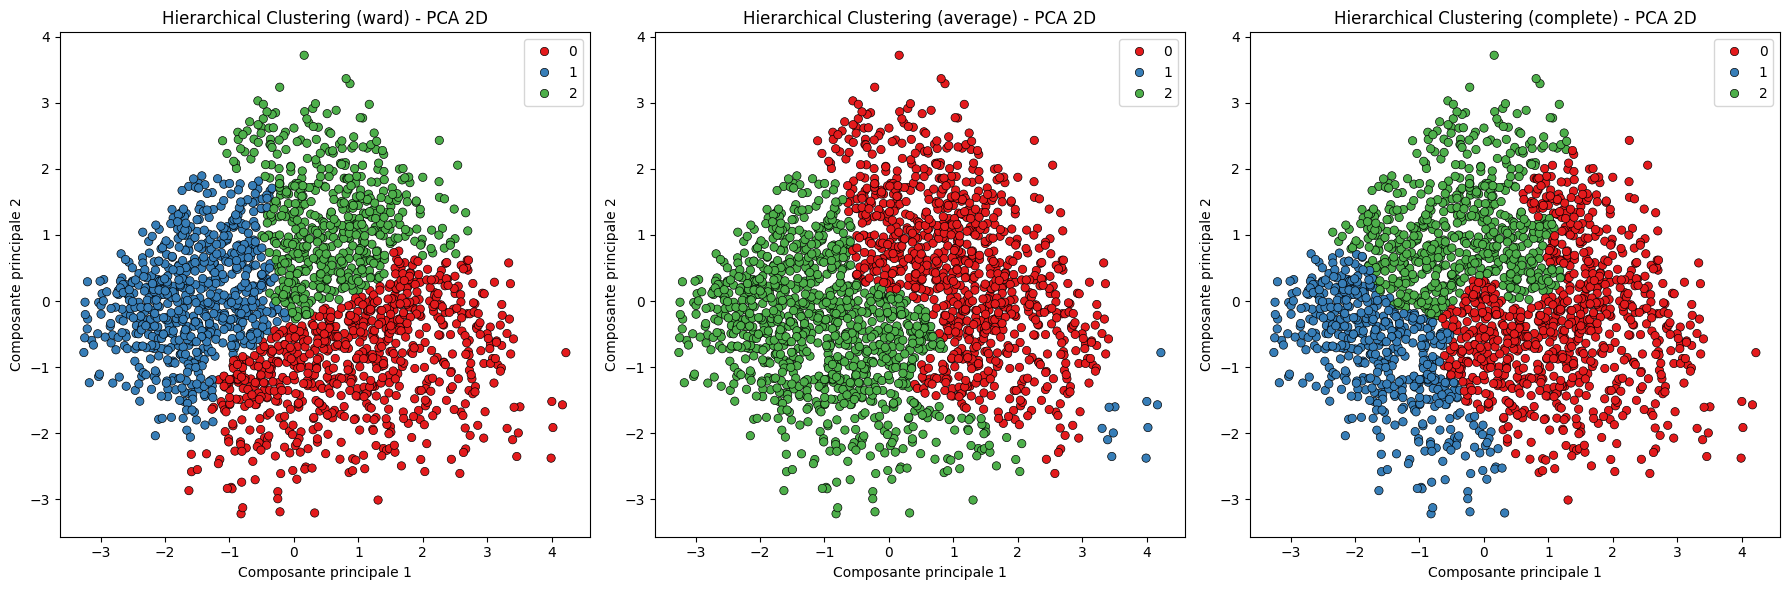

Adjusted Rand Index (ward): 0.14
Adjusted Rand Index (average): 0.24
Adjusted Rand Index (complete): 0.13


In [63]:
linkage_dict_pca = {}
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

i = 0
for linkage in ("ward", "average", "complete"):
    # Agglomerative Clustering sur PCA 2D
    clustering_pca = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    clustering_pca.fit(pca_df_2d[["PC1", "PC2"]])
    labels_pca = clustering_pca.labels_

    sns.scatterplot(
        x="PC1",
        y="PC2",
        hue=labels_pca,
        palette="Set1",
        data=pca_df_2d,
        ax=ax[i],
        edgecolor="k",
    )
    ax[i].set_title(f"Hierarchical Clustering ({linkage}) - PCA 2D")
    ax[i].set_xlabel("Composante principale 1")
    ax[i].set_ylabel("Composante principale 2")

    linkage_dict_pca[linkage] = clustering_pca
    i += 1

plt.tight_layout()
plt.show()

# Évaluation des clusters
for linkage, clustering_model in linkage_dict_pca.items():
    ari = adjusted_rand_score(data["Stress_Level"], clustering_model.labels_)
    print(f"Adjusted Rand Index ({linkage}): {ari:.2f}")

#
### Spectral Clustering

* `affinity="nearest_neighbors"` : utilise un graphe basé sur les voisins les plus proches.

* `eigen_solver="arpack"` pour la décomposition spectrale.

In [65]:
from sklearn.cluster import SpectralClustering

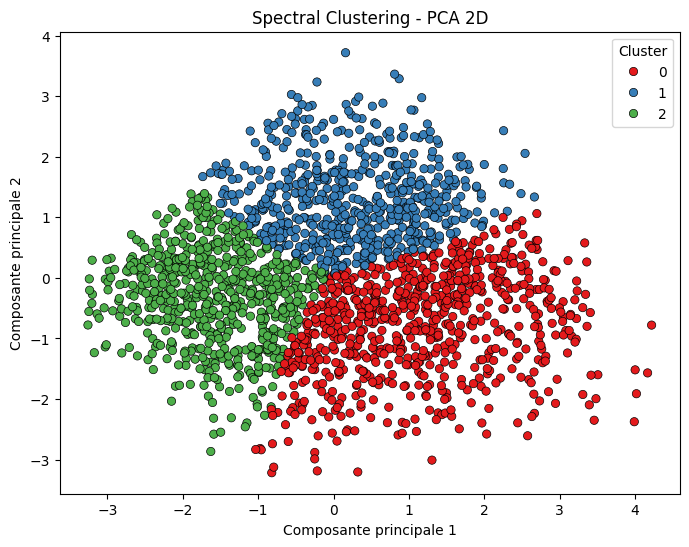

Adjusted Rand Index (Spectral Clustering): 0.19


In [67]:
plt.figure(figsize=(8, 6))

# Init de Spectral Clustering pour 3 clusters
spectral_pca = SpectralClustering(
    n_clusters=3, eigen_solver="arpack", affinity="nearest_neighbors", random_state=42
)
spectral_pca.fit(pca_df_2d[["PC1", "PC2"]])
labels_pca = spectral_pca.labels_

sns.scatterplot(
    x="PC1", y="PC2", hue=labels_pca, palette="Set1", data=pca_df_2d, edgecolor="k"
)
plt.title("Spectral Clustering - PCA 2D")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster", loc="best")
plt.show()

# Évaluation du clustering
ari = adjusted_rand_score(data["Stress_Level"], labels_pca)
print(f"Adjusted Rand Index (Spectral Clustering): {ari:.2f}")

**Interprétation :**

Les valeurs de Adjusted Rand Index (ARI) obtenues pour différentes méthodes de clustering indiquent leur capacité à reproduire correctement les clusters attendus (ici les niveaux de stress réels). L'ARI varie entre -1 (clustering opposé aux vrais clusters) et 1 (clustering parfait), avec 0 représentant un clustering aléatoire.

* K-Means (ARI=0.25) a obtenu la meilleure performance parmi les méthodes testées : il y a une légère corrélation avec les clusters réels, mais la performance reste modeste. Comme K-Means fonctionne mieux sur des clusters sphériques bien séparés, donc cette performance suggère que les clusters PCA 2D ne sont pas parfaitement séparables en espaces euclidiens.

* Agglomerative Clustering :
    * La méthode Ward (ARI=0.14) a un score très faible. Elle tend à regrouper les points en minimisant la variance intra-cluster, ce qui pourrait ne pas être adapté pour des clusters non sphériques.

    * La méthode Average (ARI=0.24), basée sur la distance moyenne entre points de clusters, est plus flexible et performe mieux que Ward.

    * La méthode Complete (ARI=0.13) privilégie les points les plus éloignés pour définir les clusters, mais cela semble moins bien correspondre aux données PCA 2D dont nous disposons.

* Spectral Clustering (AR=0.19) a obtenu un ARI modéré, inférieur à K-Means mais supérieur à la plupart des approches hiérarchiques.

#
## 4. Méthodes de classification supervisée

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [84]:
# Encodage des niveaux de stress (low, high, moderate)
y = data["Stress_Level"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaled_data)


# test/train
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_encoded, test_size=0.2, random_state=42
)

#
### Régression logistique

In [85]:
log_reg_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"],
    "max_iter": [100, 200, 500],
}
grid_log_reg = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=log_reg_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_log_reg.fit(X_train, y_train)

print("\nBest parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best cross-validated accuracy:", grid_log_reg.best_score_)


Best parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.6937499999999999


In [93]:
# Modèle de régression logistique
log_reg = LogisticRegression(C=100, max_iter=100, solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy Logistic Regression: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("\nClassification Report (Logistic Regression):")
print(
    classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_)
)
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log_reg))

Accuracy Logistic Regression: 0.73

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

        High       0.78      0.83      0.81       206
         Low       0.77      0.64      0.70        67
    Moderate       0.62      0.61      0.62       127

    accuracy                           0.73       400
   macro avg       0.72      0.70      0.71       400
weighted avg       0.73      0.73      0.73       400

Confusion Matrix (Logistic Regression):
[[171   9  26]
 [  2  43  22]
 [ 45   4  78]]


In [91]:
best_model = grid_log_reg.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.73
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       206
           1       0.77      0.64      0.70        67
           2       0.62      0.61      0.62       127

    accuracy                           0.73       400
   macro avg       0.72      0.70      0.71       400
weighted avg       0.73      0.73      0.73       400



#
### Support Vector Machine (SVM)

In [87]:
svm_params = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ["rbf"],
}
grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid=svm_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_svm.fit(X_train, y_train)

print("\nBest parameters for SVM:", grid_svm.best_params_)
print("Best cross-validated accuracy:", grid_svm.best_score_)


Best parameters for SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validated accuracy: 0.740625


In [97]:
# Modèle SVM avec noyau RBF
svm_model = SVC(kernel="rbf", C=1, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"\nAccuracy SVM (RBF kernel): {accuracy_score(y_test, y_pred_svm):.2f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy SVM (RBF kernel): 0.75

Classification Report (SVM):
              precision    recall  f1-score   support

        High       0.88      0.75      0.81       206
         Low       0.72      0.70      0.71        67
    Moderate       0.62      0.77      0.69       127

    accuracy                           0.75       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.77      0.75      0.75       400

Confusion Matrix (SVM):
[[155   8  43]
 [  3  47  17]
 [ 19  10  98]]


In [98]:
best_model = grid_svm.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.7525
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       206
           1       0.73      0.73      0.73        67
           2       0.62      0.76      0.68       127

    accuracy                           0.75       400
   macro avg       0.74      0.75      0.74       400
weighted avg       0.77      0.75      0.76       400



#
### Random Forest

In [102]:
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validated accuracy:", grid_rf.best_score_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy: 0.72875


In [99]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       206
           1       0.63      0.57      0.60        67
           2       0.61      0.70      0.65       127

    accuracy                           0.70       400
   macro avg       0.68      0.67      0.68       400
weighted avg       0.71      0.70      0.71       400

[[155  13  38]
 [ 10  38  19]
 [ 29   9  89]]


In [107]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.6975
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       206
           1       0.66      0.55      0.60        67
           2       0.58      0.73      0.65       127

    accuracy                           0.70       400
   macro avg       0.68      0.67      0.67       400
weighted avg       0.71      0.70      0.70       400



#
### KNN

In [104]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_knn.fit(X_train, y_train)

print("\nBest parameters for k-NN:", grid_knn.best_params_)
print("Best cross-validated accuracy:", grid_knn.best_score_)


Best parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validated accuracy: 0.715625


In [106]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       206
           1       0.70      0.60      0.65        67
           2       0.60      0.72      0.66       127

    accuracy                           0.73       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.74      0.73      0.73       400

[[159   6  41]
 [  7  40  20]
 [ 24  11  92]]


In [109]:
best_model = grid_knn.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.7275
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       206
           1       0.70      0.60      0.65        67
           2       0.60      0.72      0.66       127

    accuracy                           0.73       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.74      0.73      0.73       400



#
### Arbre de décisions

In [110]:
dt_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
}
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_dt.fit(X_train, y_train)

print("\nBest parameters for Decision Tree:", grid_dt.best_params_)
print("Best cross-validated accuracy:", grid_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validated accuracy: 0.703125


In [111]:
# Modèle d'arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Test
print(f"\nAccuracy Decision Tree: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy Decision Tree: 0.67

Classification Report (Decision Tree):
              precision    recall  f1-score   support

        High       0.75      0.74      0.75       206
         Low       0.56      0.52      0.54        67
    Moderate       0.60      0.63      0.61       127

    accuracy                           0.67       400
   macro avg       0.64      0.63      0.63       400
weighted avg       0.67      0.67      0.67       400

Confusion Matrix (Decision Tree):
[[153  14  39]
 [ 17  35  15]
 [ 34  13  80]]


In [112]:
best_model = grid_dt.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       206
           1       0.59      0.66      0.62        67
           2       0.62      0.60      0.61       127

    accuracy                           0.69       400
   macro avg       0.66      0.67      0.66       400
weighted avg       0.69      0.69      0.69       400



**Interprétation :**

Les résultats montrent que le SVM avec une accuracy de 75% est le modèle le plus performant parmi ceux testés, tandis que l'arbre de décision obtient une accuracy plus faible (69%). Les SVM sont efficaces dans des espaces de faible dimension, comme les deux dimensions résultant du PCA.


#
## 5. Approche de Deep Learning pour prédire le niveau de stress en fonction des habitudes de vie

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical

In [114]:
# Encoder les niveaux de stress (low, moderate, high)
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled_data)

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)

# model
model = Sequential(
    [
        Dense(
            128, input_dim=X_train.shape[1], activation="relu"
        ),  # 1ère couche dense
        Dropout(0.3),  # éviter le surajustement
        Dense(64, activation="relu"),  # 2e couche dense
        Dropout(0.3),
        Dense(32, activation="relu"),  # 3e couche dense
        Dropout(0.2),
        Dense(y_categorical.shape[1], activation="softmax"),  # Couche de output
    ]
)

# Compiler le modèle
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping pour éviter le surajustement
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Training
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Prédictions
y_pred_proba = model.predict(X_test)
y_pred = tf.argmax(y_pred_proba, axis=1)
y_test_labels = tf.argmax(y_test, axis=1)

print("\nClassification Report (Deep Learning):")
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

C:\Users\Océane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4813 - loss: 0.9844 - val_accuracy: 0.7031 - val_loss: 0.6685
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6960 - loss: 0.6531 - val_accuracy: 0.7781 - val_loss: 0.5179
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7870 - loss: 0.5179 - val_accuracy: 0.8250 - val_loss: 0.4306
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8229 - loss: 0.4345 - val_accuracy: 0.8250 - val_loss: 0.3611
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8315 - loss: 0.3922 - val_accuracy: 0.8687 - val_loss: 0.2973
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8773 - loss: 0.3185 - val_accuracy: 0.9125 - val_loss: 0.2402
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8795 - loss: 0.2909 - val_accuracy: 0.9375 - val_loss: 0.2220
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.2776 - val_accuracy: 0.9344 - 

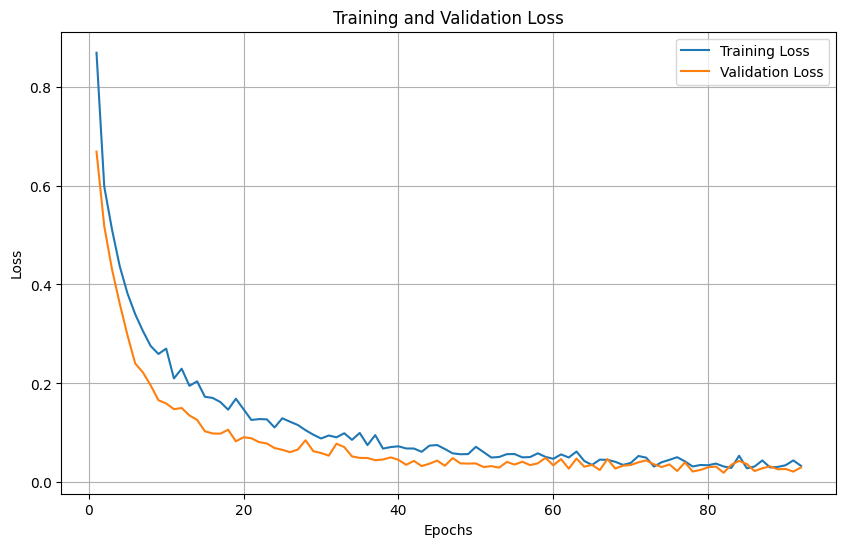

In [116]:
# Courbes loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Training Loss")  # courbe d'entraînement
plt.plot(epochs, val_loss, label="Validation Loss")  # courbe de validation
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#
### Prédiction pour un input en particulier

In [120]:
# Données spécifiques pour l'étudiant à prédire
new_student_data = np.array([[4, 0, 9, 2, 0.5, 2.6]])

new_student_data_scaled = scaler.transform(new_student_data)
prediction = model.predict(new_student_data_scaled)
predicted_class = np.argmax(prediction, axis=1)
predicted_stress_level = label_encoder.inverse_transform(predicted_class)

print(f"Predicted Stress Level: {predicted_stress_level[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Predicted Stress Level: High


#
## 6. CatBoostClassifier

In [50]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       206
         Low       1.00      1.00      1.00        67
    Moderate       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



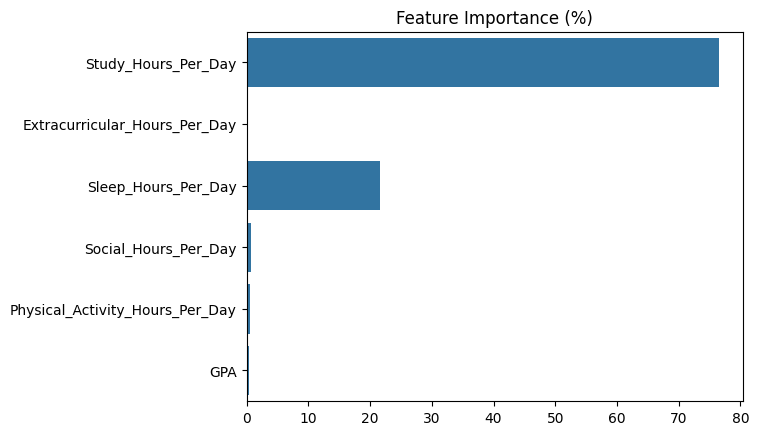

In [ ]:
# Lecture du fichier
df = pd.read_csv("student_lifestyle_dataset.csv", index_col= "Student_ID")
df = df.reset_index(drop= True)

X = df[df.columns[:-1]]
y = df["Stress_Level"]

# train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=100, verbose=False, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.barplot(x = model.feature_importances_, y = X_train.columns)
plt.title("Feature Importance (%)")
plt.ylabel("")
plt.show()

#
### 7. Réseaux

Fonctionne en python 3.11.9 mais pas sur la dernière version.

In [1]:
import pandas as pd
import numpy as np
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn2graph as bnPlot	
import pyAgrum.lib.dynamicBN as gdyn

In [2]:
# Lecture du fichier
df = pd.read_csv("student_lifestyle_dataset.csv", index_col= "Student_ID")
df = df.reset_index(drop= True)


# Discrétisation en intervalles
discr_df = pd.DataFrame()
for col in df.columns[:-1]:
	bins = np.linspace(min(df[col]), max(df[col]), 5)
	discr_df[col] = pd.cut(df[col], bins = bins , include_lowest=True)

# Vérification qu'on a pas de valeur nulle
if df.isnull().values.any():
	print("There are NaN values.")

# Enregistrement du fichier
discr_df["Stress_Level"] = df["Stress_Level"]
discr_df.to_csv("discr_df.csv", index = False)
discr_df

Study_Hours_Per_Day Extracurricular_Hours_Per_Day Sleep_Hours_Per_Day  \
0            (6.25, 7.5]                    (3.0, 4.0]         (7.5, 8.75]   
1          (4.999, 6.25]                    (3.0, 4.0]         (7.5, 8.75]   
2          (4.999, 6.25]                    (3.0, 4.0]        (8.75, 10.0]   
3            (6.25, 7.5]                    (2.0, 3.0]         (6.25, 7.5]   
4            (7.5, 8.75]                 (-0.001, 1.0]         (6.25, 7.5]   
...                  ...                           ...                 ...   
1995         (6.25, 7.5]                 (-0.001, 1.0]         (6.25, 7.5]   
1996         (6.25, 7.5]                    (2.0, 3.0]        (8.75, 10.0]   
1997       (4.999, 6.25]                 (-0.001, 1.0]       (4.999, 6.25]   
1998         (7.5, 8.75]                 (-0.001, 1.0]         (7.5, 8.75]   
1999        (8.75, 10.0]                    (1.0, 2.0]         (6.25, 7.5]   

     Social_Hours_Per_Day Physical_Activity_Hours_Per_Day  \
0              (1.5, 3.0]                  (-0.001, 3.25]   
1              (3.0, 4.5]                  (-0.001, 3.25]   
2           (-0.001, 1.5]                     (3.25, 6.5]   
3              (1.5, 3.0]                     (3.25, 6.5]   
4              (1.5, 3.0]                     (6.5, 9.75]   
...                   ...                             ...   
1995           (1.5, 3.0]                     (6.5, 9.75]   
1996        (-0.001, 1.5]                     (3.25, 6.5]   
1997        (-0.001, 1.5]                    (9.75, 13.0]   
1998           (3.0, 4.5]                     (3.25, 6.5]   
1999           (3.0, 4.5]                  (-0.001, 3.25]   

                             GPA Stress_Level  
0                   (2.68, 3.12]     Moderate  
1                   (2.68, 3.12]          Low  
2     (2.2390000000000003, 2.68]          Low  
3                   (2.68, 3.12]     Moderate  
4                   (3.12, 3.56]         High  
...                          ...          ...  
1995                (3.12, 3.56]     Moderate  
1996  (2.2390000000000003, 2.68]     Moderate  
1997                (3.12, 3.56]     Moderate  
1998                (2.68, 3.12]         High  
1999                 (3.56, 4.0]         High  

[2000 rows x 7 columns]

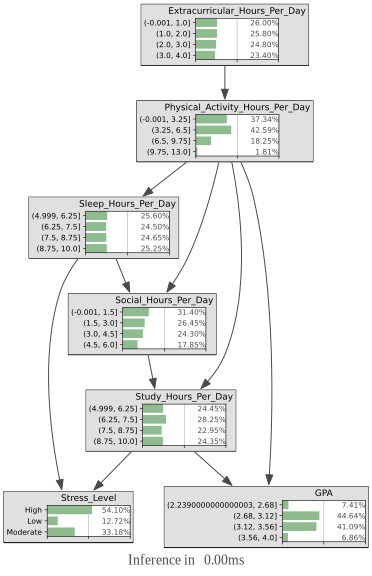

(pyAgrum.Potential@000001F6A8162300) 
             ||  Stress_Level               |
Study_|Sleep_||High     |Low      |Moderate |
------|------||---------|---------|---------|
(4.999|(4.999|| 0.7396  | 0.1952  | 0.0652  |
(6.25,|(4.999|| 0.7886  | 0.0001  | 0.2112  |
(7.5, |(4.999|| 0.9271  | 0.0002  | 0.0727  |
(8.75,|(4.999|| 0.9996  | 0.0002  | 0.0002  |
(4.999|(6.25,|| 0.0002  | 0.7279  | 0.2720  |
(6.25,|(6.25,|| 0.0001  | 0.0001  | 0.9997  |
[...4 more line(s) ...]
(7.5, |(7.5, || 0.6632  | 0.0002  | 0.3366  |
(8.75,|(7.5, || 0.9997  | 0.0002  | 0.0002  |
(4.999|(8.75,|| 0.0002  | 0.7719  | 0.2280  |
(6.25,|(8.75,|| 0.0002  | 0.0002  | 0.9997  |
(7.5, |(8.75,|| 0.6248  | 0.0002  | 0.3750  |
(8.75,|(8.75,|| 0.9997  | 0.0002  | 0.0002  |

In [3]:
# En utilisant LocalSearchWithTabuList
learner=gum.BNLearner("discr_df.csv")
learner.useLocalSearchWithTabuList()
dag = learner.learnBN()
#gnb.showBN(dag, size = 100)
gnb.showInference(dag)
dag.cpt("Stress_Level")

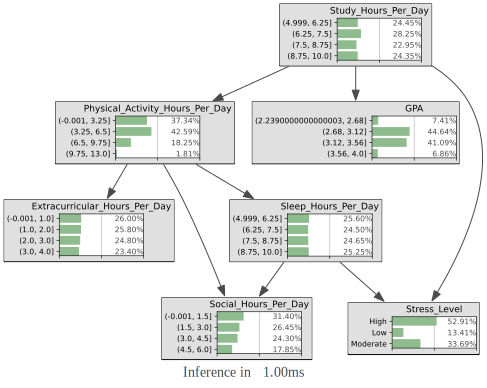

(pyAgrum.Potential@000001F6C044DA40) 
             ||  Stress_Level               |
Study_|Sleep_||High     |Low      |Moderate |
------|------||---------|---------|---------|
(4.999|(4.999|| 0.7396  | 0.1952  | 0.0652  |
(6.25,|(4.999|| 0.7886  | 0.0001  | 0.2112  |
(7.5, |(4.999|| 0.9271  | 0.0002  | 0.0727  |
(8.75,|(4.999|| 0.9996  | 0.0002  | 0.0002  |
(4.999|(6.25,|| 0.0002  | 0.7279  | 0.2720  |
(6.25,|(6.25,|| 0.0001  | 0.0001  | 0.9997  |
[...4 more line(s) ...]
(7.5, |(7.5, || 0.6632  | 0.0002  | 0.3366  |
(8.75,|(7.5, || 0.9997  | 0.0002  | 0.0002  |
(4.999|(8.75,|| 0.0002  | 0.7719  | 0.2280  |
(6.25,|(8.75,|| 0.0002  | 0.0002  | 0.9997  |
(7.5, |(8.75,|| 0.6248  | 0.0002  | 0.3750  |
(8.75,|(8.75,|| 0.9997  | 0.0002  | 0.0002  |

In [4]:
# En utilisant GreedyHillClimbing
learner=gum.BNLearner(f"discr_df.csv")
learner.useGreedyHillClimbing()
dag = learner.learnBN()
#gnb.showBN(dag, size = 100)
gnb.showInference(dag)
dag.cpt("Stress_Level")